In [110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv("/home/ariyaman/learntocode/Stockipy/data/historical_stock_data_HDFCBANK.csv")

In [112]:
df.head()

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-26,EQ,1707.95,1710.90,1691.10,1711.35,1693.50,1701.50,1703.01,1757.5,1363.55,23798333,4.052887e+10,424591,HDFCBANK
1,2024-06-25,EQ,1671.10,1716.95,1671.10,1672.40,1707.00,1711.35,1705.04,1757.5,1363.55,37260774,6.353113e+10,690683,HDFCBANK
2,2024-06-24,EQ,1647.00,1675.10,1645.75,1665.75,1671.00,1672.40,1664.93,1757.5,1363.55,14272497,2.376264e+10,387580,HDFCBANK
3,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.5,1363.55,25815388,4.281944e+10,408577,HDFCBANK
4,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.5,1363.55,20704371,3.453260e+10,465827,HDFCBANK


In [113]:
df.DATE= pd.to_datetime(df.DATE)
df2 =df.set_index('DATE')

In [114]:
data = list(df2["CLOSE"])

In [115]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.2469061062836646
2. P-Value :  0.6530996620278416
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 2853
5. Critical Values :
	 1% :  -3.4326441441956144
	 5% :  -2.862553595853849
	 10% :  -2.567309566974286


In [116]:
!pip install pmdarima

In [117]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [118]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [119]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

2756 100


In [120]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27044.161, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27044.064, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27044.375, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27044.225, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27042.541, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27043.895, Time=0.80 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.792 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2856
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -13520.270
Date:                Sun, 30 Jun 2024   AIC                          27042.541
Time:                        11:40:18   BIC                          27048.498
Sample:                             0   HQIC                         27044.689
    

In [121]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [122]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2856
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -13744.912
Date:                Sun, 30 Jun 2024   AIC                          27501.825
Time:                        11:40:19   BIC                          27537.564
Sample:                             0   HQIC                         27514.712
                               - 2856                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8516      0.006   -145.649      0.000      -0.863      -0.840
ar.L2         -0.7142      0.007    -99.529      0.000      -0.728      -0.700
ar.L3         -0.5286      0.007    -80.525      0.000      -0.541      -0.516
ar.L4         -0.3194      0.006    -56.670      0.000      -0.330      -0.308
ar.L5         -0.1499      0.004    -34.842      0.000      -0.158      -0.141
sigma2       892.7093      1.588    562.077      0.000     889.596     895.822
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):          52029079.26
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            17.39
Prob(H) (two-sided):                  0.00   Kurtosis:                       663.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
import pickle

with open('/home/ariyaman/learntocode/Stockipy/models/ARIMA/AXIS_HDFC.pkl', 'wb') as pkl_file:
    pickle.dump(model, pkl_file)


In [124]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([721.23357921, 703.02135776, 698.21477599, 699.78723432,
       705.63493193, 714.35605646, 719.77581783, 726.54696337,
       717.88859634, 687.56134113, 690.84567429, 699.66874273,
       699.33802961, 685.22499256, 695.34205692, 687.57986674,
       672.5223738 , 677.65853831, 689.94031922, 680.27995423,
       695.44803469, 689.53355376, 691.81212185, 690.54696691,
       699.07268938, 672.10382503, 655.48429777, 659.31325301,
       632.58275231, 636.00929825, 629.52783593, 624.67914382,
       614.32680037, 618.27629479, 616.89452645, 611.39037008,
       621.24000223, 629.17897107, 624.18205906, 626.13215772,
       613.83272073, 608.34925719, 602.14440528, 602.82091425,
       625.03385836, 631.95487297, 648.20660207, 645.10305241,
       657.02171287, 639.65598817, 647.29071842, 658.66645467,
       658.92222688, 642.81604857, 628.82021006, 632.58475235,
       623.89370063, 616.77753696, 620.35540043, 642.3810757 ,
       653.82168572, 660.54748632, 665.3663438 , 673.79

In [125]:
s = pd.Series(pred, index =df2.index[-100:])
s

DATE
2013-05-24    721.233579
2013-05-23    703.021358
2013-05-22    698.214776
2013-05-21    699.787234
2013-05-20    705.634932
                 ...    
2013-01-07    672.062979
2013-01-04    668.242654
2013-01-03    680.599358
2013-01-02    685.236835
2013-01-01    689.356082
Length: 100, dtype: float64

<Axes: xlabel='DATE'>

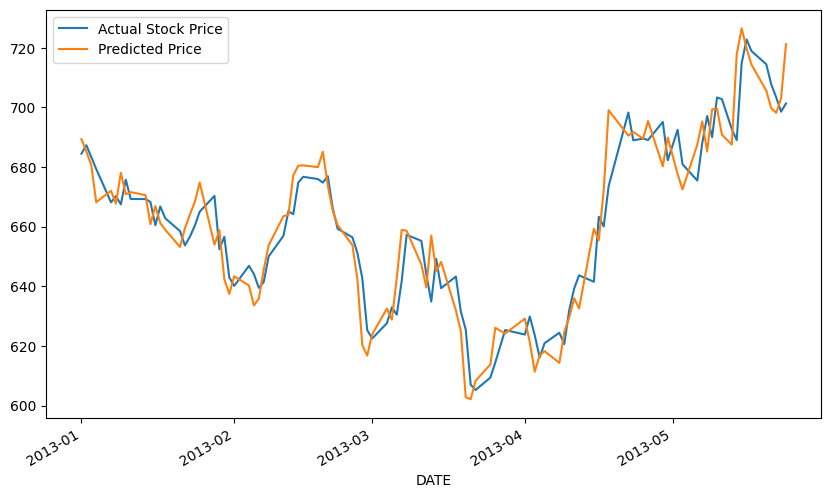

In [126]:
plt.figure(figsize=(10,6), dpi=100)
df2['CLOSE'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

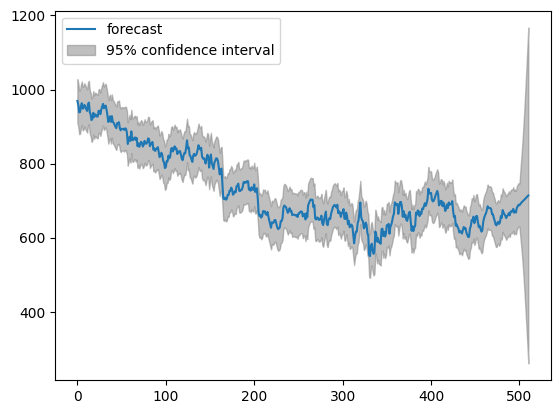

In [127]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [128]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

9.565015763028994

In [129]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.8805929458617242

In [130]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([689.35608167, 687.76600287, 691.0217812 , 694.61068628,
       696.87820863, 699.11146604, 701.22824186, 704.06232514,
       706.75902433, 709.33095092, 711.77041198])

In [131]:
import datetime
start_date = datetime.datetime(2021,12,31)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [132]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2021-12-31    689.356082
2022-01-01    687.766003
2022-01-02    691.021781
2022-01-03    694.610686
2022-01-04    696.878209
2022-01-05    699.111466
2022-01-06    701.228242
2022-01-07    704.062325
2022-01-08    706.759024
2022-01-09    709.330951
2022-01-10    711.770412
dtype: float64

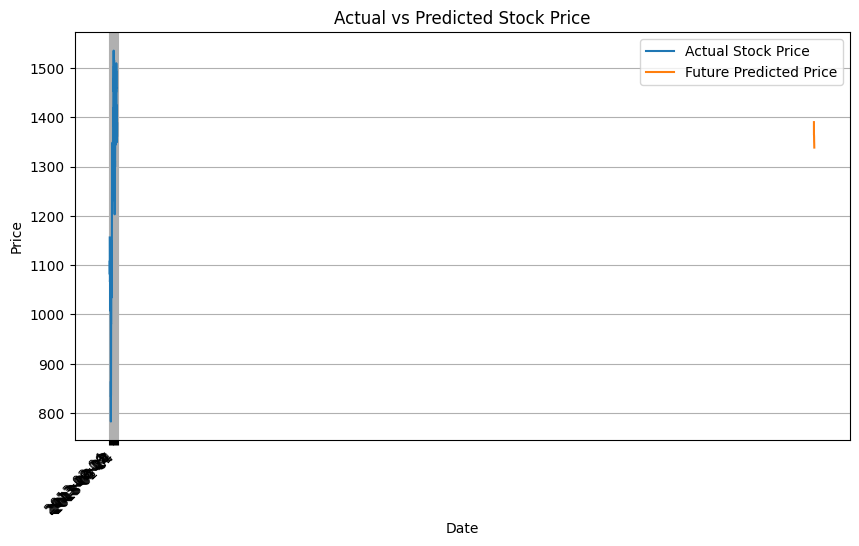

In [89]:
plt.figure(figsize=(10,6), dpi=100)
df2['CLOSE'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

# Setting x-ticks
plt.xticks(rotation=45)

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()

In [91]:
check_df = pd.read_csv("/home/ariyaman/learntocode/Stockipy/data/historical_stock_data_AXIS.csv")

In [95]:
check_df.DATE= pd.to_datetime(check_df.DATE)
check_df2 =check_df.set_index('DATE')

In [96]:
check_df2

,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
DATE,,,,,,,,,,,,,,
2024-06-27,EQ,1310.00,1310.00,1280.00,1285.40,1288.05,1288.95,1293.09,1310.00,927.15,22311393,2.885058e+10,295852,AXISBANK
2024-06-26,EQ,1281.10,1292.95,1259.20,1271.45,1284.00,1285.40,1277.28,1292.95,927.15,13956370,1.782626e+10,252419,AXISBANK
2024-06-25,EQ,1234.45,1278.75,1226.00,1228.10,1272.65,1271.45,1259.63,1278.75,927.15,17607952,2.217949e+10,328365,AXISBANK
2024-06-24,EQ,1231.00,1235.75,1225.05,1237.45,1229.65,1228.10,1229.00,1246.00,927.15,6676530,8.205424e+09,199186,AXISBANK
2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.10,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-07,EQ,1385.00,1387.70,1365.50,1378.95,1366.00,1372.85,1374.90,1396.50,835.10,1143170,1.571740e+09,36901,AXISBANK
2013-01-04,EQ,1382.45,1386.95,1370.00,1389.95,1377.25,1378.95,1378.26,1396.50,784.00,1252580,1.726378e+09,30409,AXISBANK
2013-01-03,EQ,1394.00,1396.50,1383.25,1386.85,1390.00,1389.95,1390.26,1396.50,784.00,950039,1.320797e+09,36368,AXISBANK


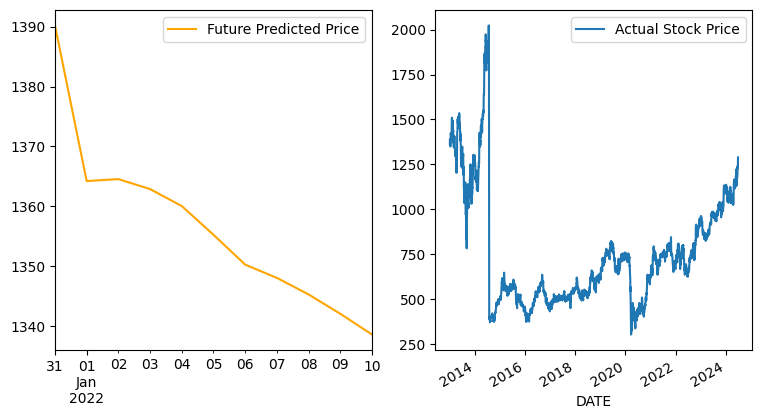

In [98]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
check_df2['CLOSE'].plot(label='Actual Stock Price', legend=True)
plt.show()